<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset</h1>


<h2>Objective</h2><ul><li> How to apply different activation functions on the MNIST dataset.</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will test sigmoid, tanh, and relu activation functions on the MNIST dataset.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion Function, and Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid, Tanh, and Relu</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>


<h2>Preparation</h2>


We'll need the following libraries


In [1]:
# Uncomment the following line to install the torchvision library
# !mamba install -y torchvision

# Import the libraries we need for this lab

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class using the sigmoid activation function: 


In [2]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x


Define the neural network module or class using the Tanh activation function:


In [3]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

Define the neural network module or class using the Relu activation function:


In [4]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss for each iteration  and accuracy on the validation data.


In [5]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss': [], 'train_accuracy': [], 'validation_accuracy': []}  

    for epoch in range(1, epochs+1):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
        train_correct = 0
        for x, y in train_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            train_correct += (label == y).sum().item()
        train_accuracy = 100 * (train_correct / len(train_dataset))
        useful_stuff['train_accuracy'].append(train_accuracy)
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
        print(f'epoch {epoch}: train loss: {loss.item():.4f}, train accuracy: {train_accuracy:.4f}, validation accuracy: {accuracy:.4f}')

    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [7]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print(validation_dataset)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


Create the training-data loader and the validation-data loader object:


In [8]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer, and Train the Model</h2> 


Create the criterion function: 


In [9]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the model with 100 hidden neurons:  


In [10]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

<!--Empty Space for separating topics-->


<h2 id="Test">Test Sigmoid, Tanh, and Relu</h2> 


Train the network by using the sigmoid activations function:


In [11]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

epoch 1: train loss: 2.3100, train accuracy: 10.4467, validation accuracy: 10.2800
epoch 2: train loss: 2.2887, train accuracy: 12.8567, validation accuracy: 12.7300
epoch 3: train loss: 2.2786, train accuracy: 20.3800, validation accuracy: 20.4400
epoch 4: train loss: 2.2701, train accuracy: 15.1950, validation accuracy: 15.6800
epoch 5: train loss: 2.2657, train accuracy: 15.3583, validation accuracy: 16.2100
epoch 6: train loss: 2.2546, train accuracy: 18.9700, validation accuracy: 19.9400
epoch 7: train loss: 2.2487, train accuracy: 24.5067, validation accuracy: 25.7900
epoch 8: train loss: 2.2359, train accuracy: 29.6200, validation accuracy: 31.2900
epoch 9: train loss: 2.2279, train accuracy: 34.8700, validation accuracy: 36.2200
epoch 10: train loss: 2.2258, train accuracy: 39.4133, validation accuracy: 40.8400
epoch 11: train loss: 2.2141, train accuracy: 42.7400, validation accuracy: 44.3500
epoch 12: train loss: 2.2071, train accuracy: 45.9933, validation accuracy: 47.7600
e

Train the network by using the Tanh activations function:


In [12]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

epoch 1: train loss: 2.2325, train accuracy: 28.8000, validation accuracy: 30.2600
epoch 2: train loss: 2.1298, train accuracy: 51.5667, validation accuracy: 53.4800
epoch 3: train loss: 2.0294, train accuracy: 63.1850, validation accuracy: 64.4400
epoch 4: train loss: 1.9238, train accuracy: 68.5133, validation accuracy: 69.2600
epoch 5: train loss: 1.8170, train accuracy: 71.3750, validation accuracy: 72.0300
epoch 6: train loss: 1.7063, train accuracy: 72.9633, validation accuracy: 73.5900
epoch 7: train loss: 1.6143, train accuracy: 73.9233, validation accuracy: 74.4900
epoch 8: train loss: 1.5038, train accuracy: 74.5950, validation accuracy: 75.4300
epoch 9: train loss: 1.4142, train accuracy: 75.2383, validation accuracy: 76.3000
epoch 10: train loss: 1.3333, train accuracy: 75.8983, validation accuracy: 76.9400
epoch 11: train loss: 1.2597, train accuracy: 76.5950, validation accuracy: 77.6100
epoch 12: train loss: 1.1990, train accuracy: 77.3267, validation accuracy: 78.4500
e

Train the network by using the Relu activations function:


In [13]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=30)

epoch 1: train loss: 2.2727, train accuracy: 22.2383, validation accuracy: 21.5600
epoch 2: train loss: 2.2228, train accuracy: 34.9517, validation accuracy: 34.5200
epoch 3: train loss: 2.1705, train accuracy: 44.3833, validation accuracy: 44.2700
epoch 4: train loss: 2.1103, train accuracy: 50.4950, validation accuracy: 50.9900
epoch 5: train loss: 2.0318, train accuracy: 54.7333, validation accuracy: 55.5200
epoch 6: train loss: 1.9615, train accuracy: 58.2567, validation accuracy: 58.8700
epoch 7: train loss: 1.8602, train accuracy: 61.7450, validation accuracy: 62.4400
epoch 8: train loss: 1.7575, train accuracy: 65.4567, validation accuracy: 65.9300
epoch 9: train loss: 1.6734, train accuracy: 68.7417, validation accuracy: 69.0100
epoch 10: train loss: 1.5699, train accuracy: 71.3617, validation accuracy: 71.8100
epoch 11: train loss: 1.4711, train accuracy: 73.4500, validation accuracy: 74.1200
epoch 12: train loss: 1.3946, train accuracy: 75.1983, validation accuracy: 76.0900
e

<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2> 


Compare the training loss for each activation: 


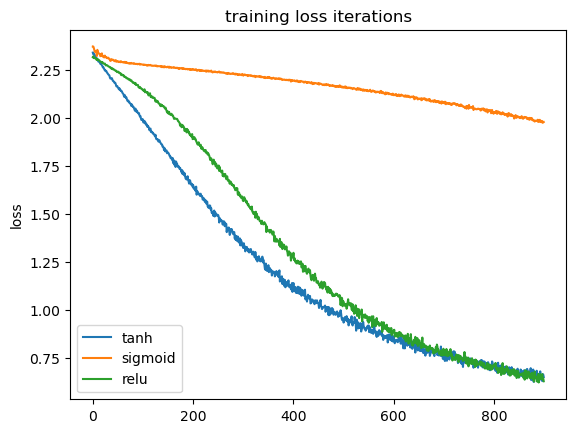

In [14]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Compare the validation loss for each model:  


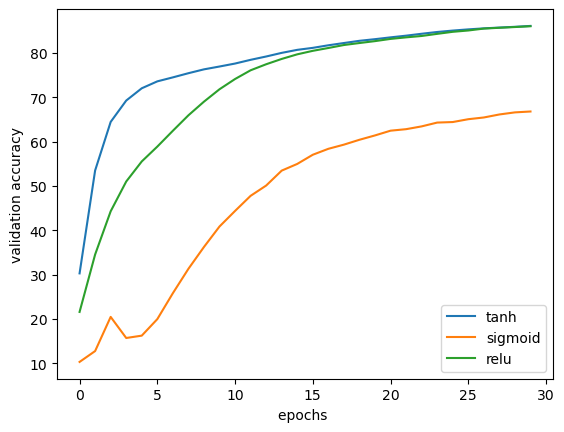

In [15]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


## Which activation function performed best ?


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |
-->


<hr>





## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
